# **Video Games 2016 Analysis and 2017 Predictions**

##  **Project Overview**

    - Description: our dataset includes info on video game sales, user and expert reviews, genres, platforms (ex: Xbox, PlayStation), and ESRB age ratings.
    - Project goals: 
        * Identify Key Success Factors.
        * Predict Potential Hits.
        * Guide Advertising Strategies.

    - Define the problem statement.
        -Problem statement: identify key factors that determine a video game's success to help Ice optimize its advertising strategies for 2017.
        -Key questions: 
            - What platforms and genres generate the highest sales.
            - How do user and critic reviews impact a game's sales performance.
            - What trends can be observed in platform lifecycles over time.
            - How do regional preferences (NA, EU, JP) differ in terms of platform genre and ESRB ratings.
            - Are there significant differences in user ratings between platforms or genres.

### **Step 1. Open the data file and study the general information**

#### **Import Libs**

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats 
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression
import re

# Display settings
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

#### **Load & Inspect Data**

In [4]:
df_games = pd.read_csv("games.csv")
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### **Data Cleaning & Transformation**

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Step 2. Prepare the data**

#### **Replace the column names (make them lowercase).**

In [6]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# replace column names (lowercase)
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### **Convert the data to the required types.** 
##### **Data Cleaning & Transformation**

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### **Convert data types**

In [10]:
# replace 'tbd' with NaN, then convert to float
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan).astype(float)
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['critic_score'] = df_games['critic_score'].astype('Int64')
# df_games.info()

string_cols = ['name', 'platform', 'genre', 'rating']
df_games[string_cols] = df_games[string_cols].astype('string')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
dtypes: Int64(2), float64(5), string(4)
memory usage: 1.4 MB


#### **Describe the columns where the data types have been changed and why.**
    - 'name', 'platform', 'genre', and 'rating' changed to string for better performance.
    - 'year_of_release' to integer, to preserve missing values (NaN) and avoid decimals.
    - 'critic_score' to integer, to get rid of the unnecessary decimals. 
    - 'user_score' had a mix of dtype:float, and object. it was then coonverted to float after replacing missing vals with nan to perform numerical analysis and visualizations.  

#### **If necessary, decide how to deal with missing values:**
- 'critic_score' : filled with 0, to not mess with the scores 
- 'user_score' : filled with 0, to not mess with the scores 
- 'rating' : kept as 'NaN'
- 'year_of_release' : will be dropped

#### **Explain why you filled in the missing values as you did or why you decided to leave them blank.s**
out of 16715 entries:

    - year_of_release   -> exists in some names as (year+1), should we use it, or drop it!? (only 269 missing vals, not worth the pain? **I am dropping them!**)
    - critic_score:     -> majority of the missing vals are related to earlier and older games.
    - user_score:       -> numerical, could be replaced by "0", same as critic_score. 
        * missing vals marked with 'tbd', are games lately released, and still missing users data. will be replaced with 0 

#### **Why do you think the values are missing? Give possible reasons.**
    It could be: old games, new games or no sales.

#### **Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.**
    Answered earlier: will be replaced/filled with nan or 0, since no review is available.

In [11]:
df_games.sort_values('user_score', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14412,Breath of Fire III,PSP,2005,Role-Playing,0.00,0.02,0.00,0.01,<NA>,9.7,T
8975,Boktai: The Sun is in Your Hand,GBA,2003,Role-Playing,0.10,0.04,0.00,0.00,83,9.6,E
3417,Harvest Moon: Friends of Mineral Town,GBA,2003,Simulation,0.34,0.13,0.11,0.01,81,9.6,E
16546,Wade Hixton's Counter Punch,GBA,2004,Sports,0.01,0.00,0.00,0.00,78,9.5,T
16627,Karnaaj Rally,GBA,2003,Racing,0.01,0.00,0.00,0.00,81,9.5,E
10105,Cory in the House,DS,2007,Action,0.10,0.00,0.00,0.01,<NA>,9.5,E
11119,Super Puzzle Fighter II,GBA,<NA>,Puzzle,0.06,0.02,0.00,0.00,83,9.5,E
1645,Golden Sun: The Lost Age,GBA,2002,Role-Playing,0.61,0.27,0.27,0.07,86,9.5,E
5920,MLB SlugFest Loaded,PS2,2004,Sports,0.14,0.11,0.00,0.04,77,9.5,T
1068,Resident Evil 4,GC,2005,Action,0.98,0.42,0.22,0.06,96,9.4,M


In [12]:
# fill missing values
df_games['critic_score'] = df_games['critic_score'].fillna(0).astype('Int64')
df_games['user_score'] = df_games['user_score'].fillna(0)

In [13]:
missing_years = df_games[df_games['year_of_release'].isnull()].sort_values(by=["year_of_release"], ascending=True)
missing_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,0,0.0,<NA>
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,0,0.0,<NA>


In [14]:
drp_mss_yrs = df_games.dropna(subset=['year_of_release'])

In [8]:
df_games.sort_values('user_score', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.0,0.00,NaN,tbd,T
10948,The Revenge of Shinobi,GBA,2002,Platform,0.07,0.02,0.0,0.00,51.0,tbd,E
3955,Disney Sing It,PS2,2008,Misc,0.25,0.19,0.0,0.06,NaN,tbd,E
10850,NFL Blitz 20-02,XB,2002,Sports,0.07,0.02,0.0,0.00,77.0,tbd,E
10847,Just Dance 2017,WiiU,2016,Misc,0.03,0.06,0.0,0.01,NaN,tbd,E10+
10845,Rocky,GC,2002,Fighting,0.07,0.02,0.0,0.00,74.0,tbd,T
10843,thinkSMART,DS,2010,Misc,0.09,0.00,0.0,0.01,NaN,tbd,E
10826,Shox,PS2,2002,Racing,0.05,0.04,0.0,0.01,78.0,tbd,E
10812,Bejeweled Twist,DS,2010,Puzzle,0.00,0.08,0.0,0.01,77.0,tbd,E
10807,Alvin and the Chipmunks: The Squeakquel,Wii,2009,Misc,0.09,0.00,0.0,0.01,NaN,tbd,E


#### **Describe columns where data types have been changed and why**
    Only 'year_of_release' was changed for now, since 'critic_score', 'user_score', and 'rating' should have their missing values changed first before moving forward.
    - year_of_release: current data type is float, changed to integer, allowing to keep the missing values. (Replacing values to median could be done after extracting dates from the names.)  

#### **decide how to deal with missing values**
- 'critic_score' : filled with 0, to not change mess with the scores 
- 'user_score' : filled with 0, to not change mess with the scores 
- 'rating' : kept as 'NaN'
- 'year_of_release' : (left to the end)

#### **Why do you think the values are missing? Give possible reasons**
out of 16715 entries:

    - year_of_release:  Int64    -> exists in some names as (year+1), 
    - critic_score:     float64  -> these missing values are for the majority linked to earlier and older games.
    - user_score:       float64  -> numerical, could be replaced by "0", same as critic_score. For the missing values with 'tbd', they seem to be related to games with not many sales, or no sales. This type of data could give some insights about what makes some games sell more than others. and we might keep them

In [9]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
# fill missing values
df_games['critic_score'] = df_games['critic_score'].fillna(0).astype('Int64')
df_games['user_score'] = df_games['user_score'].fillna(0)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  Int64  
 9   user_score       16715 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


In [12]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN


In [13]:
df_games.shape
#df_games.isnull().sum()

(16715, 11)

In [14]:
missing_years = df_games[df_games['year_of_release'].isnull()].sort_values(by=["year_of_release"], ascending=True)
missing_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,0,0,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,0,0,NaN


In [15]:
drp_mss_yrs = df_games.dropna(subset=['year_of_release'])

In [16]:
drp_mss_yrs.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN


In [15]:
df_games.shape
#df_games.isnull().sum()

(16715, 11)

In [16]:
# # drop rows with missing 'year_or_release'
# df_games = df_games.dropna(subset=['year_of_release'])

drp_mss_yrs['user_score'] = drp_mss_yrs['user_score'].replace('TBD', '0')  # Replace 'TBD' with '0'

# replace missing vals
drp_mss_yrs['user_score'] = drp_mss_yrs['user_score'].fillna(0)      
drp_mss_yrs['rating'] = drp_mss_yrs['rating'].fillna('Unknown')      

drp_mss_yrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16446 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  string 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  Int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  string 
dtypes: Int64(2), float64(5), string(4)
memory usage: 1.5 MB


/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/1086941118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drp_mss_yrs['user_score'] = drp_mss_yrs['user_score'].replace('TBD', '0')  # Replace 'TBD' with '0'
/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/1086941118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drp_mss_yrs['user_score'] = drp_mss_yrs['user_score'].fillna(0)
/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/1086941118.py:8: SettingWithCo

In [17]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,<NA>


#### **Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.**

In [18]:
drp_mss_yrs["total_sales"] = drp_mss_yrs["na_sales"] + drp_mss_yrs["eu_sales"] + drp_mss_yrs["jp_sales"] + drp_mss_yrs["other_sales"]
drp_mss_yrs.head()

/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/805528118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drp_mss_yrs["total_sales"] = drp_mss_yrs["na_sales"] + drp_mss_yrs["eu_sales"] + drp_mss_yrs["jp_sales"] + drp_mss_yrs["other_sales"]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Unknown,31.38


### **Step 3. Analyze the data**

#### **Look at how many games were released in different years. Is the data for every period significant?**

- how many games were released in different years.
- Is the data for every period significant?

##### **Game Releases by Year**

In [19]:
gm_release_yr = drp_mss_yrs.groupby('year_of_release')['name'].count()

#games_pr_yr = drp_mss_yrs['year_of_release'].value_counts().sort_index()
gm_release_yr

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

##### **Is the data for every period significant?**

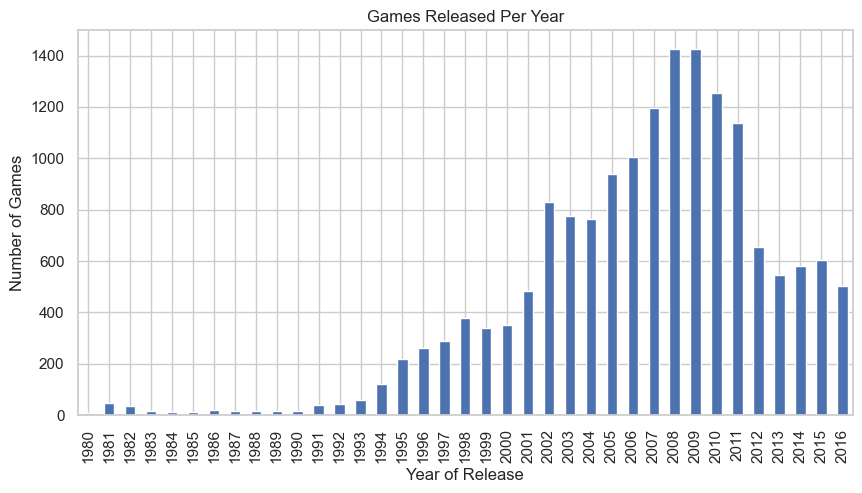

In [20]:
gm_release_yr.plot(kind='bar', figsize=(10, 5), title='Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

##### **Conclusion** 
from the plot we are able to understand that there are 4 major timelines trends in the number of video games released annually from 1980 to 2016: 

    - 1980 - 1990: no or very low releases, not many deelopers?   
    - 1991 - 2001: notable growth in game releases
    - 2001 - 2011: rapid acceleration from 2000 onward. 
    - 2008 - 2009: peak in games releases with over 1,400. 
    - 2010 - 2012: gradual decline maybe due to market saturation, shift in gaming platforms, change in consumer behavior. 
    - 2013 - 2016: number of releases stabilized at a lower level if compared to th peak years, which suggests a more selective or consolidated game landscape.

#### **Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

##### **build a distribution based on data for each year**

In [21]:
# Sales by Platform Over Time
## group by platform and year
pltfrm_yr_sales = drp_mss_yrs.groupby('platform')['total_sales'].sum().reset_index().round(2)
pltfrm_yr_sales = pltfrm_yr_sales.sort_values(by='total_sales', ascending=False)
pltfrm_yr_sales.head()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


##### build a distribution for PS2

In [22]:
ps2_df = drp_mss_yrs[drp_mss_yrs['platform'] == 'PS2']
ps2_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,0,0.0,Unknown,0.01


In [23]:
ps2_distribution = ps2_df.groupby('year_of_release')['total_sales'].sum().reset_index()
ps2_distribution = ps2_distribution.sort_values(by='year_of_release', ascending=True)
ps2_distribution

,year_of_release,total_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/1961408774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ps2_distribution, x='year_of_release', y='total_sales', palette='coolwarm')


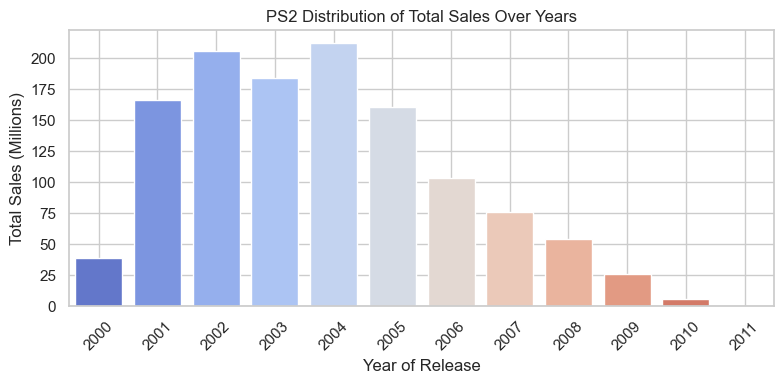

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(data=ps2_distribution, x='year_of_release', y='total_sales', palette='coolwarm')
plt.title('PS2 Distribution of Total Sales Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


##### **Find platforms that used to be popular but now have zero sales**

In [25]:
drp_mss_yrs.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.0,16446.00,16446.00,16446.00,16446.00,16446.0,16446.00,16446.00
mean,2006.48,0.26,0.15,0.08,0.05,33.49,3.23,0.54
std,5.88,0.82,0.51,0.31,0.19,35.82,3.69,1.56
min,1980.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,2003.0,0.00,0.00,0.00,0.00,0.0,0.00,0.06
50%,2007.0,0.08,0.02,0.00,0.01,0.0,0.00,0.17
75%,2010.0,0.24,0.11,0.04,0.03,70.0,7.30,0.47
max,2016.0,41.36,28.96,10.22,10.57,98.0,9.70,82.54


In [26]:
pltfrm_yr_sales

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [27]:
# Calculate platform active years
pltfrm_activity = drp_mss_yrs.groupby('platform')['year_of_release'].agg(['min', 'max'])
pltfrm_activity['active_in_2016'] = pltfrm_activity['max'] == 2016
pltfrm_activity['years_active'] = pltfrm_activity['max'] - pltfrm_activity['min'] + 1
pltfrm_activity.head()

,min,max,active_in_2016,years_active
platform,,,,
2600,1980,1989,False,10
3DO,1994,1995,False,2
3DS,2011,2016,True,6
DC,1998,2008,False,11
DS,1985,2013,False,29


In [28]:
# only rows where 'active_in_2016' is True
faded_pltfrms = pltfrm_activity[pltfrm_activity['active_in_2016'] == False]
faded_pltfrms.index

Index(['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES',
       'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
       'XB'],
      dtype='string', name='platform')

###### **Conclusion:**
Platforms that faded in 2016 are: 
    '2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 
    'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 
    'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB'

In [29]:
pltfrm_yr_sales = pltfrm_yr_sales.reset_index()
bins = pd.cut(pltfrm_yr_sales['total_sales'], bins=3, labels=['Low', 'Medium', 'High'])
pltfrm_yr_sales['sales_group'] = bins

pltfrm_grpd = pltfrm_yr_sales[['platform', 'total_sales', 'sales_group']]
pltfrm_grpd.head()


,platform,total_sales,sales_group
0,PS2,1233.56,High
1,X360,961.24,High
2,PS3,931.34,High
3,Wii,891.18,High
4,DS,802.78,Medium


In [30]:
pltfrm_grpd = (pltfrm_yr_sales.reset_index().assign(sales_group = lambda x: pd.cut(x['total_sales'], bins=3, labels=['Low', 'Medium', 'High']))[['platform', 'total_sales', 'sales_group']])

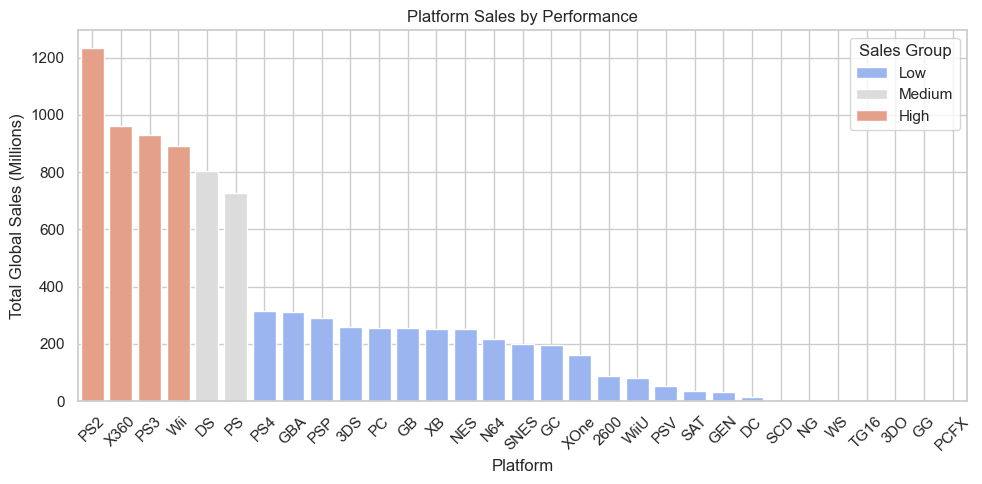

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pltfrm_grpd.sort_values('total_sales', ascending=False),
            x='platform', y='total_sales', hue='sales_group', palette='coolwarm')
plt.title('Platform Sales by Performance')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Sales Group')
plt.tight_layout()
plt.grid(True)
plt.show()

##### **Conclusion**
Our data shows that 22 platforms faded since 1980 which are: 2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB

Our plot reflects the rise and fall of different console generations over time.

    - PlayStation 2 (PS2) leads with the highest total global sales, followed by platforms like Xbox 360, PS3, and Wii. These platforms dominated due to large game libraries and global popularity. 
    - In contrast, platforms like DC, NES, or Gen had lower sales, possibly due to shorter life cycles or limited reach. 

    -> sales vary widely across platforms. PlayStation, Xbox, and Nintendo consistently have higher sales, while others have much smaller sales or faded away over time. 

##### **How long does it generally take for new platforms to appear and old ones to fade?**

In [33]:
# pltfrm_activity.head()
pltfrm_activity['years_active'].mean()


8.612903225806452

##### **Conclusion**
It takes an average of 8 years and 1/2 for a platform to fade. 

In [34]:
pltfrm_activity.describe().round(2)

,min,max,years_active
count,31.0,31.0,31.0
mean,1997.65,2005.26,8.61
std,9.09,9.27,7.0
min,1980.0,1989.0,1.0
25%,1992.5,1996.0,4.0
50%,1996.0,2007.0,7.0
75%,2004.5,2016.0,11.0
max,2013.0,2016.0,32.0


In [35]:
pltfrm_activity.head()

,min,max,active_in_2016,years_active
platform,,,,
2600,1980,1989,False,10
3DO,1994,1995,False,2
3DS,2011,2016,True,6
DC,1998,2008,False,11
DS,1985,2013,False,29


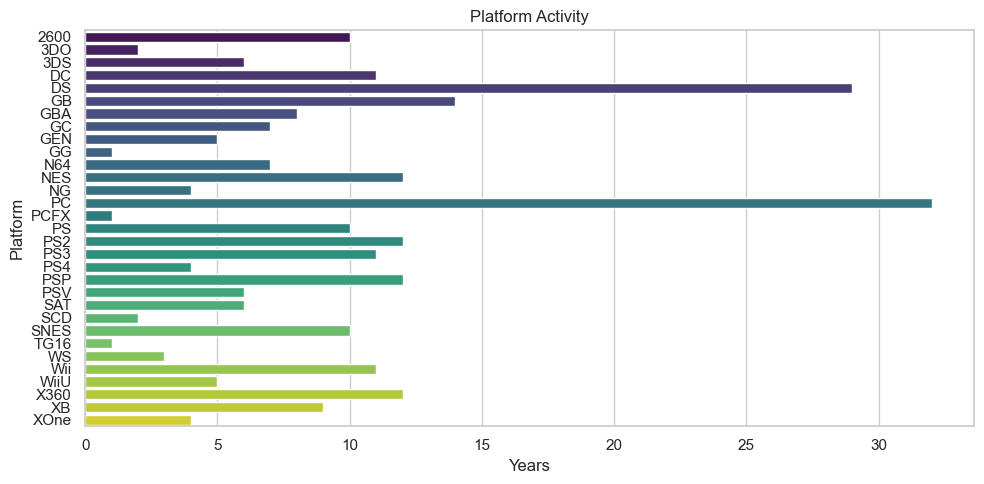

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pltfrm_activity, x='years_active', y='platform', hue='platform', palette='viridis', legend=False)
plt.title('Platform Activity')
plt.xlabel('Years')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

#### **Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.**
#### **Work only with the data that you've decided is relevant. Disregard the data for previous years.**


#### Determine what period you should take data for.


### The most relevant periods
From our earlier findings, we fiscovered that:

    - Before 1994: very low sales, no reviews: not suitable for analysis.
    - Between 1994-2001: first years of game releases: limited platforms and inconsistent data.
    - Between 2002–2011: Peak years of game releases: many active platforms and high sales.
    - Between 2012-2016: fewer platforms remain active; some platforms fade out, and a few others emerge.
    - Median year of releases is 2006, means half of the releases happened after 2006.

In [37]:
pltfrm_activity.head()

,min,max,active_in_2016,years_active
platform,,,,
2600,1980,1989,False,10
3DO,1994,1995,False,2
3DS,2011,2016,True,6
DC,1998,2008,False,11
DS,1985,2013,False,29


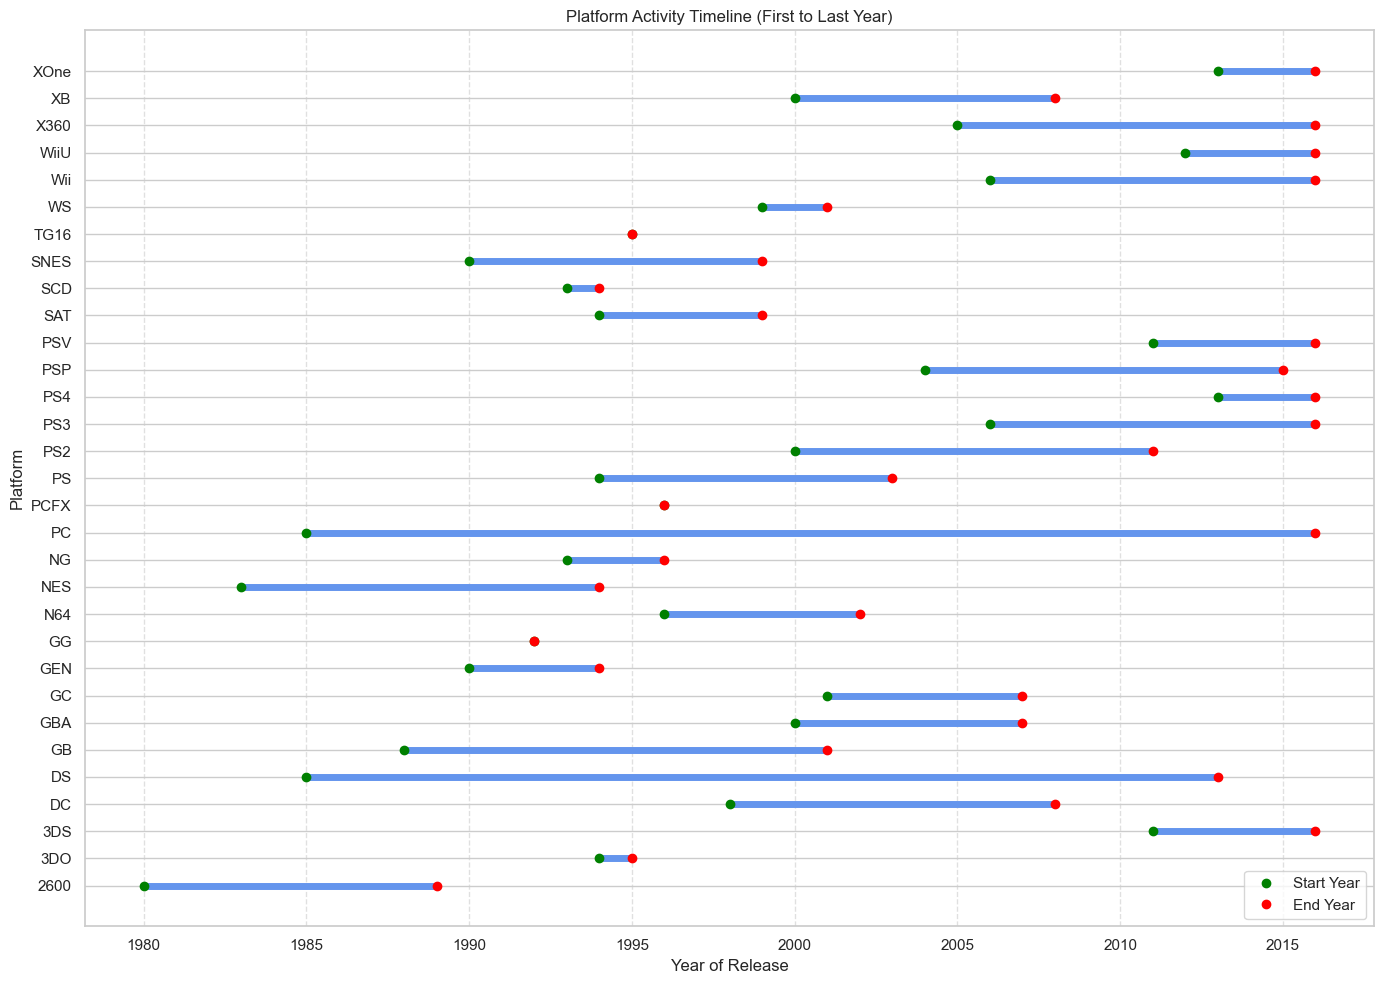

In [38]:
# Visualizing all-time platform sales
pltfrm_timeline = pltfrm_activity.reset_index()

# pltfrm_timeline = pltfrm_timeline.sort_values('min')

# Plot
plt.figure(figsize=(14, 10))
plt.hlines(y=pltfrm_timeline['platform'], xmin=pltfrm_timeline['min'], xmax=pltfrm_timeline['max'], color='cornflowerblue', linewidth=5)
plt.plot(pltfrm_timeline['min'], pltfrm_timeline['platform'], 'o', color='green', label='Start Year')
plt.plot(pltfrm_timeline['max'], pltfrm_timeline['platform'], 'o', color='red', label='End Year')

plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.title('Platform Activity Timeline (First to Last Year)')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Conclusion

Each platform has a different lifespan ranging from 1yr to 32yrs, with an average of ~ 8 years. This could depend on the platform's popularity, and or marketing.

### The most relevant period to use for our 2017 forecast building
From our earlier findings, we fiscovered that:

    - Before 1994: very low sales, no reviews: not suitable for analysis.
    - Between 1994-2001: first years of game releases: limited platforms and inconsistent data.
    - Between 2002–2011: Peak years of game releases: many active platforms and high sales.
    - Between 2012-2016: fewer platforms remain active; some platforms fade out, and a few others emerge.
    - Median year of releases is 2006, means half of the releases happened after 2006. 
    - Most platforms have a lifecycle of 5–8 years. 
    
- Should we focus on the last five years? we capture the full info about current platforms and the decline of previous generations, which is critical for understanding which platforms are rising, stable, or declining.

### Determining the Relevant Period

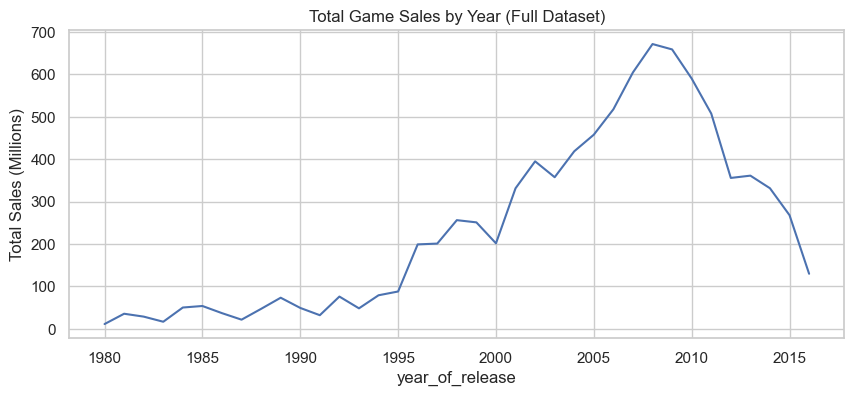

In [39]:
# annual sales trends for all the dataset
plt.figure(figsize=(10, 4))
sns.lineplot(data=drp_mss_yrs, x='year_of_release', y='total_sales', 
             estimator='sum', errorbar=None)
plt.title('Total Game Sales by Year (Full Dataset)')
plt.ylabel('Total Sales (Millions)')
plt.show()

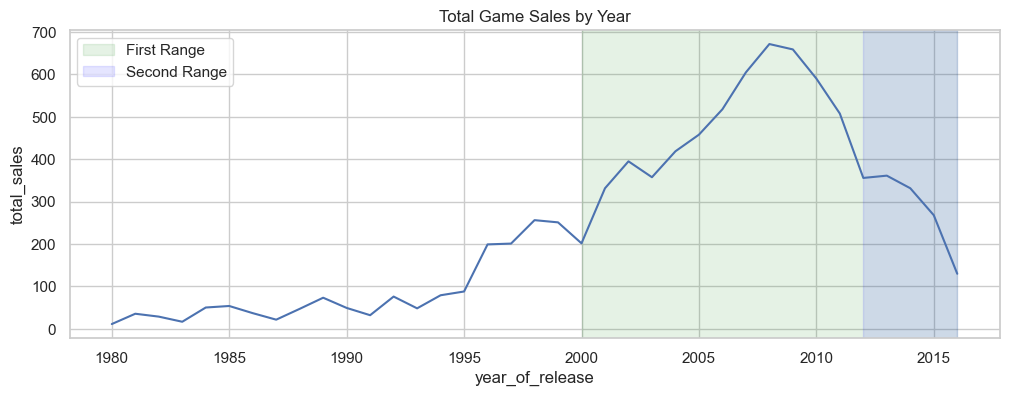

In [40]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    data=drp_mss_yrs.groupby('year_of_release')['total_sales'].sum().reset_index(), 
    x='year_of_release', y='total_sales')
plt.title('Total Game Sales by Year')
plt.axvspan(2000, 2016, color='green', alpha=0.1, label='First Range')
plt.axvspan(2012, 2016, color='blue', alpha=0.1, label='Second Range')
plt.legend()

##### **Conclusion**
    - period that will be used is: 2006–2016
        -> captures all active 2016 platforms.
        -> balanced timeframe, providing 10 years of data.
        -> includes 5 modern platforms data: 3DS, PC, PS3, PS4, and PSV which are all active.

#### **Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

##### **Filter the dataset for games released between 2006 and 2016**

In [41]:
# Filtering the relevant period (2006-2016)
relevant_df = drp_mss_yrs[drp_mss_yrs['year_of_release'].between(2006, 2016)]
relevant_df.head()

# total sales per platform
pltfrm_sales = relevant_df.groupby('platform')['total_sales'].sum().reset_index()
pltfrm_sales = pltfrm_sales.sort_values('total_sales', ascending=False)
pltfrm_sales

,platform,total_sales
13,X360,952.99
7,PS3,931.34
11,Wii,891.18
2,DS,655.35
8,PS4,314.14
6,PS2,265.80
0,3DS,257.81
9,PSP,238.63
5,PC,163.42
15,XOne,159.32


In [42]:
# leading platforms
leading_pltfrms = pltfrm_sales.head(5)
leading_pltfrms

,platform,total_sales
13,X360,952.99
7,PS3,931.34
11,Wii,891.18
2,DS,655.35
8,PS4,314.14


the leading platforms are: X360, PS3, and Wii

In [43]:
# shrinking platforms
shrinking_pltfrms = pltfrm_sales.tail(5)
shrinking_pltfrms

,platform,total_sales
10,PSV,53.81
4,GC,11.53
14,XB,10.77
3,GBA,8.68
1,DC,0.06


The shrinking platforms are: DC, GBA, and XB

In [45]:
# potentially growing platforms
recent_years = [2014, 2015, 2016]
recent_sales = relevant_df[relevant_df['year_of_release'].isin(recent_years)]
growing_pltfrms = recent_sales.groupby('platform')['total_sales'].mean().reset_index()
growing_pltfrms = growing_pltfrms.sort_values('total_sales', ascending=False)
growing_pltfrms.head(5).round(2)

,platform,total_sales
3,PS4,0.77
9,XOne,0.62
7,WiiU,0.59
6,Wii,0.46
8,X360,0.43


The growing platforms are: PS4, XOne, WiiU, Wii, and X360

#### **Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings**

In [46]:
# global sales of all games visual, broken down by platform
# average sales per platform
avg_sales = relevant_df.groupby('platform')['total_sales'].mean().reset_index()
avg_sales = avg_sales.rename(columns={'total_sales': 'avg'})
avg_sales

,platform,avg
0,3DS,0.503535
1,DC,0.030000
2,DS,0.331152
3,GBA,0.192889
4,GC,0.262045
5,PC,0.210593
6,PS2,0.330186
7,PS3,0.713124
8,PS4,0.801378
9,PSP,0.220342


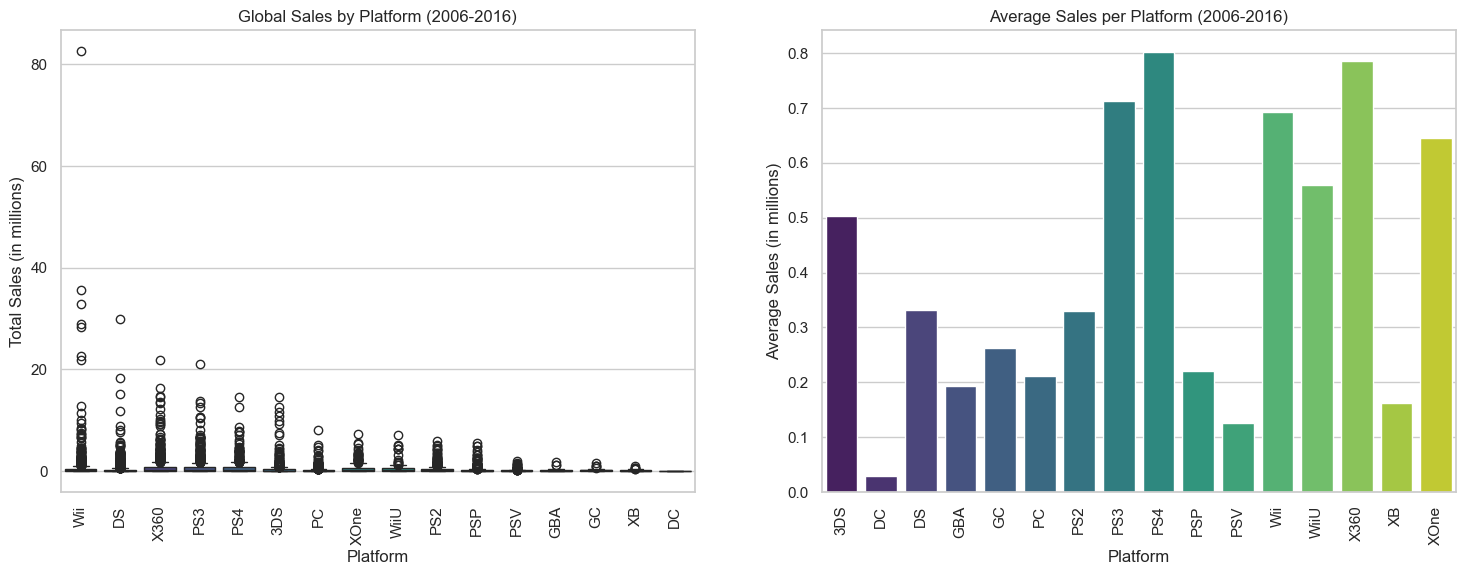

In [47]:
# figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

## Plot 1: Box plot for global sales by platform
sns.boxplot(data=relevant_df, x='platform', y='total_sales', palette='viridis', hue='platform', ax=axes[0])
axes[0].set_title('Global Sales by Platform (2006-2016)')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Sales (in millions)')
axes[0].tick_params(axis='x', rotation=90)


# Plot 2: Bar plot for average sales per platform
sns.barplot(data=avg_sales, x='platform', y='avg', palette='viridis', hue='platform' , ax=axes[1])
axes[1].set_title('Average Sales per Platform (2006-2016)')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Average Sales (in millions)')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

##### **Conclusion:**
    - the box plot of global sales shows a significant difference in the game sales, with a domincane of the wii platform, followed by DS, then the X360. 
    - the wii platform has an extended box, which suggest high variability trends that affect the sales performance 

    - as for the Performance by average sales:
        * PS4 leads with avg= 0.80, and X360 avg=0.78.
        * on the other hand, DS, PS2, and GC are on the lowest tier.

#### **Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

In [48]:
# how user and professional reviews affect sales for one popular platform = X360. 
# Filtering X360 data
x360 = relevant_df[relevant_df['platform'] == 'X360']
x360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, 14 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1214 non-null   string 
 1   platform         1214 non-null   string 
 2   year_of_release  1214 non-null   Int64  
 3   genre            1214 non-null   string 
 4   na_sales         1214 non-null   float64
 5   eu_sales         1214 non-null   float64
 6   jp_sales         1214 non-null   float64
 7   other_sales      1214 non-null   float64
 8   critic_score     1214 non-null   Int64  
 9   user_score       1214 non-null   float64
 10  rating           1214 non-null   string 
 11  total_sales      1214 non-null   float64
dtypes: Int64(2), float64(6), string(4)
memory usage: 125.7 KB


In [49]:
# Convert user_score to numeric
x360['user_score'] = pd.to_numeric(x360['user_score'], errors='coerce')
x360.head()

/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/3420918200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x360['user_score'] = pd.to_numeric(x360['user_score'], errors='coerce')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68


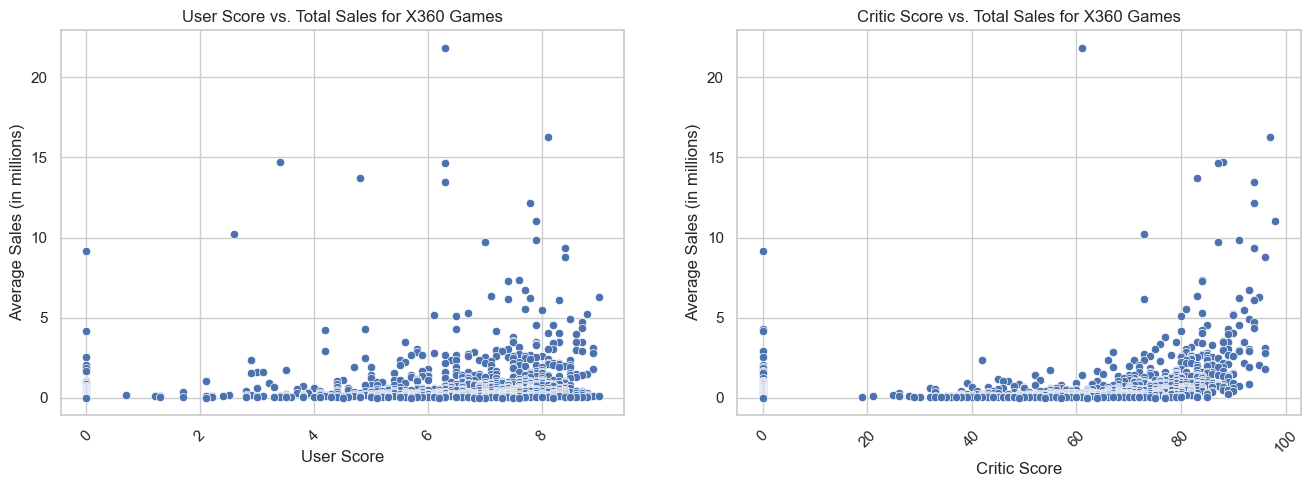

In [50]:
# Build a scatter plot 
# figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

## Plot 1: user score vs. total sales
sns.scatterplot(data=x360, x='user_score', y='total_sales', ax=axes[0])
axes[0].set_title('User Score vs. Total Sales for X360 Games')
axes[0].set_xlabel('User Score')
axes[0].set_ylabel('Average Sales (in millions)')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: critic score vs. total sales
sns.scatterplot(data=x360, x='critic_score', y='total_sales', ax=axes[1])
axes[1].set_title('Critic Score vs. Total Sales for X360 Games')
axes[1].set_xlabel('Critic Score')
axes[1].set_ylabel('Average Sales (in millions)')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

In [51]:
# calculate the correlation between reviews and sales. 
x360_clean = x360.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Correlation matrix
x360_corr = x360_clean[['user_score', 'critic_score', 'total_sales']].corr().round(4)
x360_corr 

,user_score,critic_score,total_sales
user_score,1.0000,0.7877,0.2098
critic_score,0.7877,1.0000,0.3148
total_sales,0.2098,0.3148,1.0000


In [52]:
# Mutual Information 
mi_score_critic = mutual_info_regression(x360_clean[['critic_score']], x360_clean['total_sales'])[0]
mi_score_user = mutual_info_regression(x360_clean[['user_score']], x360_clean['total_sales'])[0]

print(f"mutual info - critic score: {mi_score_critic:.4f}")
print(f"mutual info - user score: {mi_score_user:.4f}")

mutual info - critic score: 0.3556
mutual info - user score: 0.1751


In [53]:
# calculate pearson correlation coeff 
critic_corr, critic_pvalue = pearsonr(x360_clean['critic_score'], x360_clean['total_sales'])
user_corr, user_pvalue = pearsonr(x360_clean['user_score'], x360_clean['total_sales'])

print(f"correlation between critic score and sales: r = {critic_corr:.3f}, p-value = {critic_pvalue:.4e}")
print(f"correlation between user score and sales: r = {user_corr:.3f} (p-value: {user_pvalue:.4e})")

correlation between critic score and sales: r = 0.315, p-value = 2.4716e-29
correlation between user score and sales: r = 0.210 (p-value: 1.5357e-13)


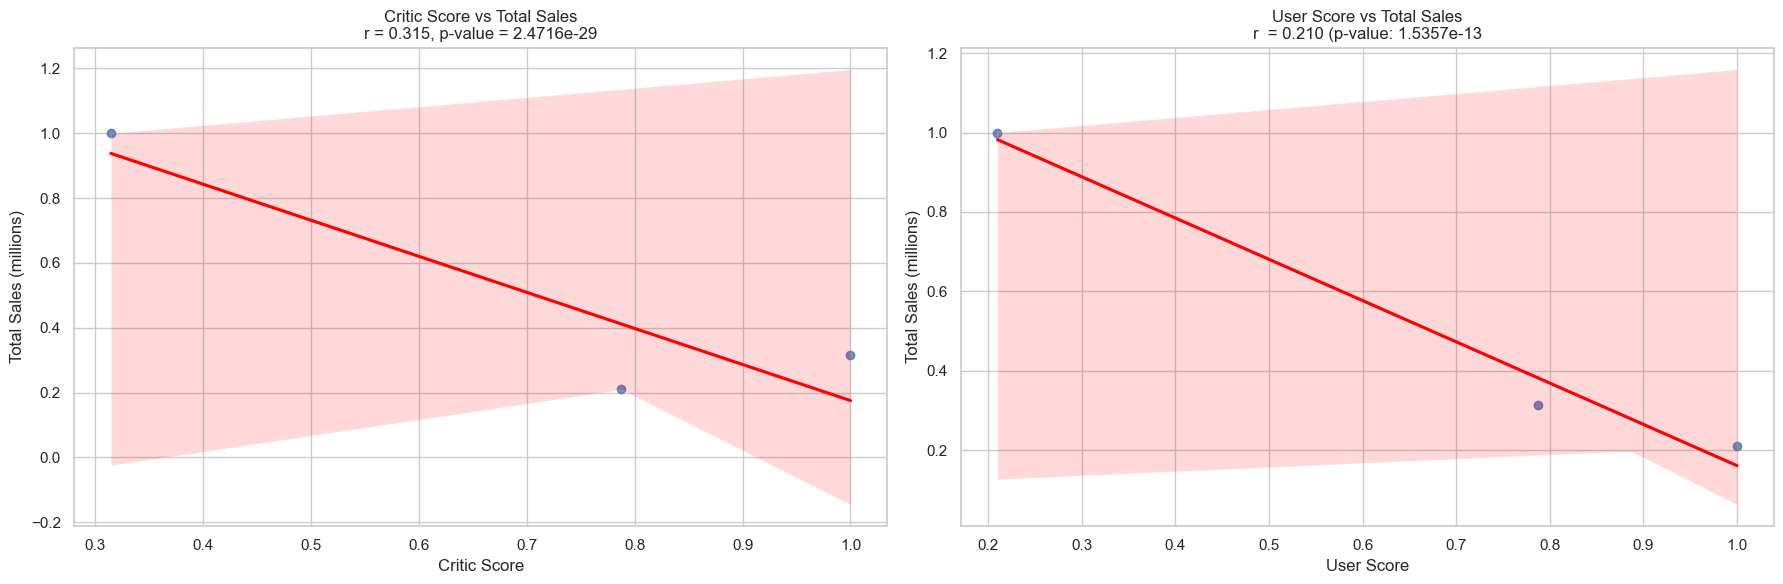

In [54]:
# plots with regression lines using pearson correlation
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Critic score plot
sns.regplot(data=x360_corr, x='critic_score', y='total_sales', ax=axes[0], line_kws={'color':'red'})
axes[0].set_title(f'Critic Score vs Total Sales\nr = {critic_corr:.3f}, p-value = {critic_pvalue:.4e}')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Total Sales (millions)')

# User score plot
sns.regplot(data=x360_corr, x='user_score', y='total_sales', ax=axes[1], line_kws={'color':'red'})
axes[1].set_title(f'User Score vs Total Sales\nr  = {user_corr:.3f} (p-value: {user_pvalue:.4e}')
axes[1].set_xlabel('User Score')
axes[1].set_ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()


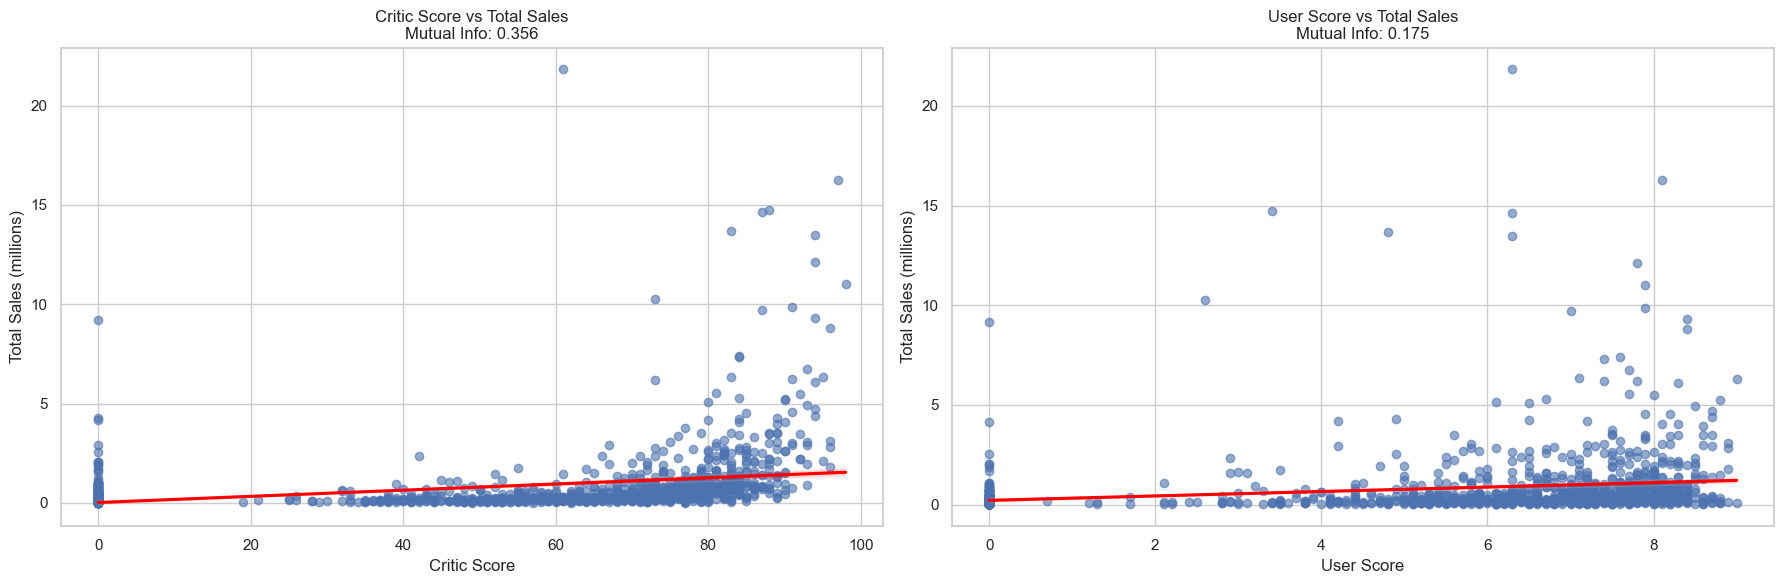

In [55]:
# scatter plots with regression lines and MI scores
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Critic Score
sns.regplot(data=x360_clean, x='critic_score', y='total_sales', ax=axes[0], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axes[0].set_title(f'Critic Score vs Total Sales\nMutual Info: {mi_score_critic:.3f}')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Total Sales (millions)')

# Plot 2: User Score
sns.regplot(data=x360_clean, x='user_score', y='total_sales', ax=axes[1], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
axes[1].set_title(f'User Score vs Total Sales\nMutual Info: {mi_score_user:.3f}')
axes[1].set_xlabel('User Score')
axes[1].set_ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()


##### **Conclusion**
    - MI score:
        * critic score= 0.3414
        * user score = 0.1582
        
    - Pearson score:
        * critic score: r = 0.307, p-value = 4.1191e-26
        * user score:   r = 0.183 (p-value: 5.3067e-10)
        * with p-value < 0.00001
    
- critic score:
    - has stronger relationship with sales than user score
    - critic score are more predictive of the game sales than user scores
    - pearson corr: r = 0.3 is moderate, which means there is a positive linear trend

- critic and user scores
    - both MI values are < 0.5 confirming that other factors like marketing, genre, platform popularity also impact the sales.
    - Both p-values are very small, confirming the relationships are not due to random chance

- user score:
    - less predictive
    - lower r and MI which could signify that the user score is more varied, due to bias?, personal preferences, inconsistent rating...
    

#### **Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

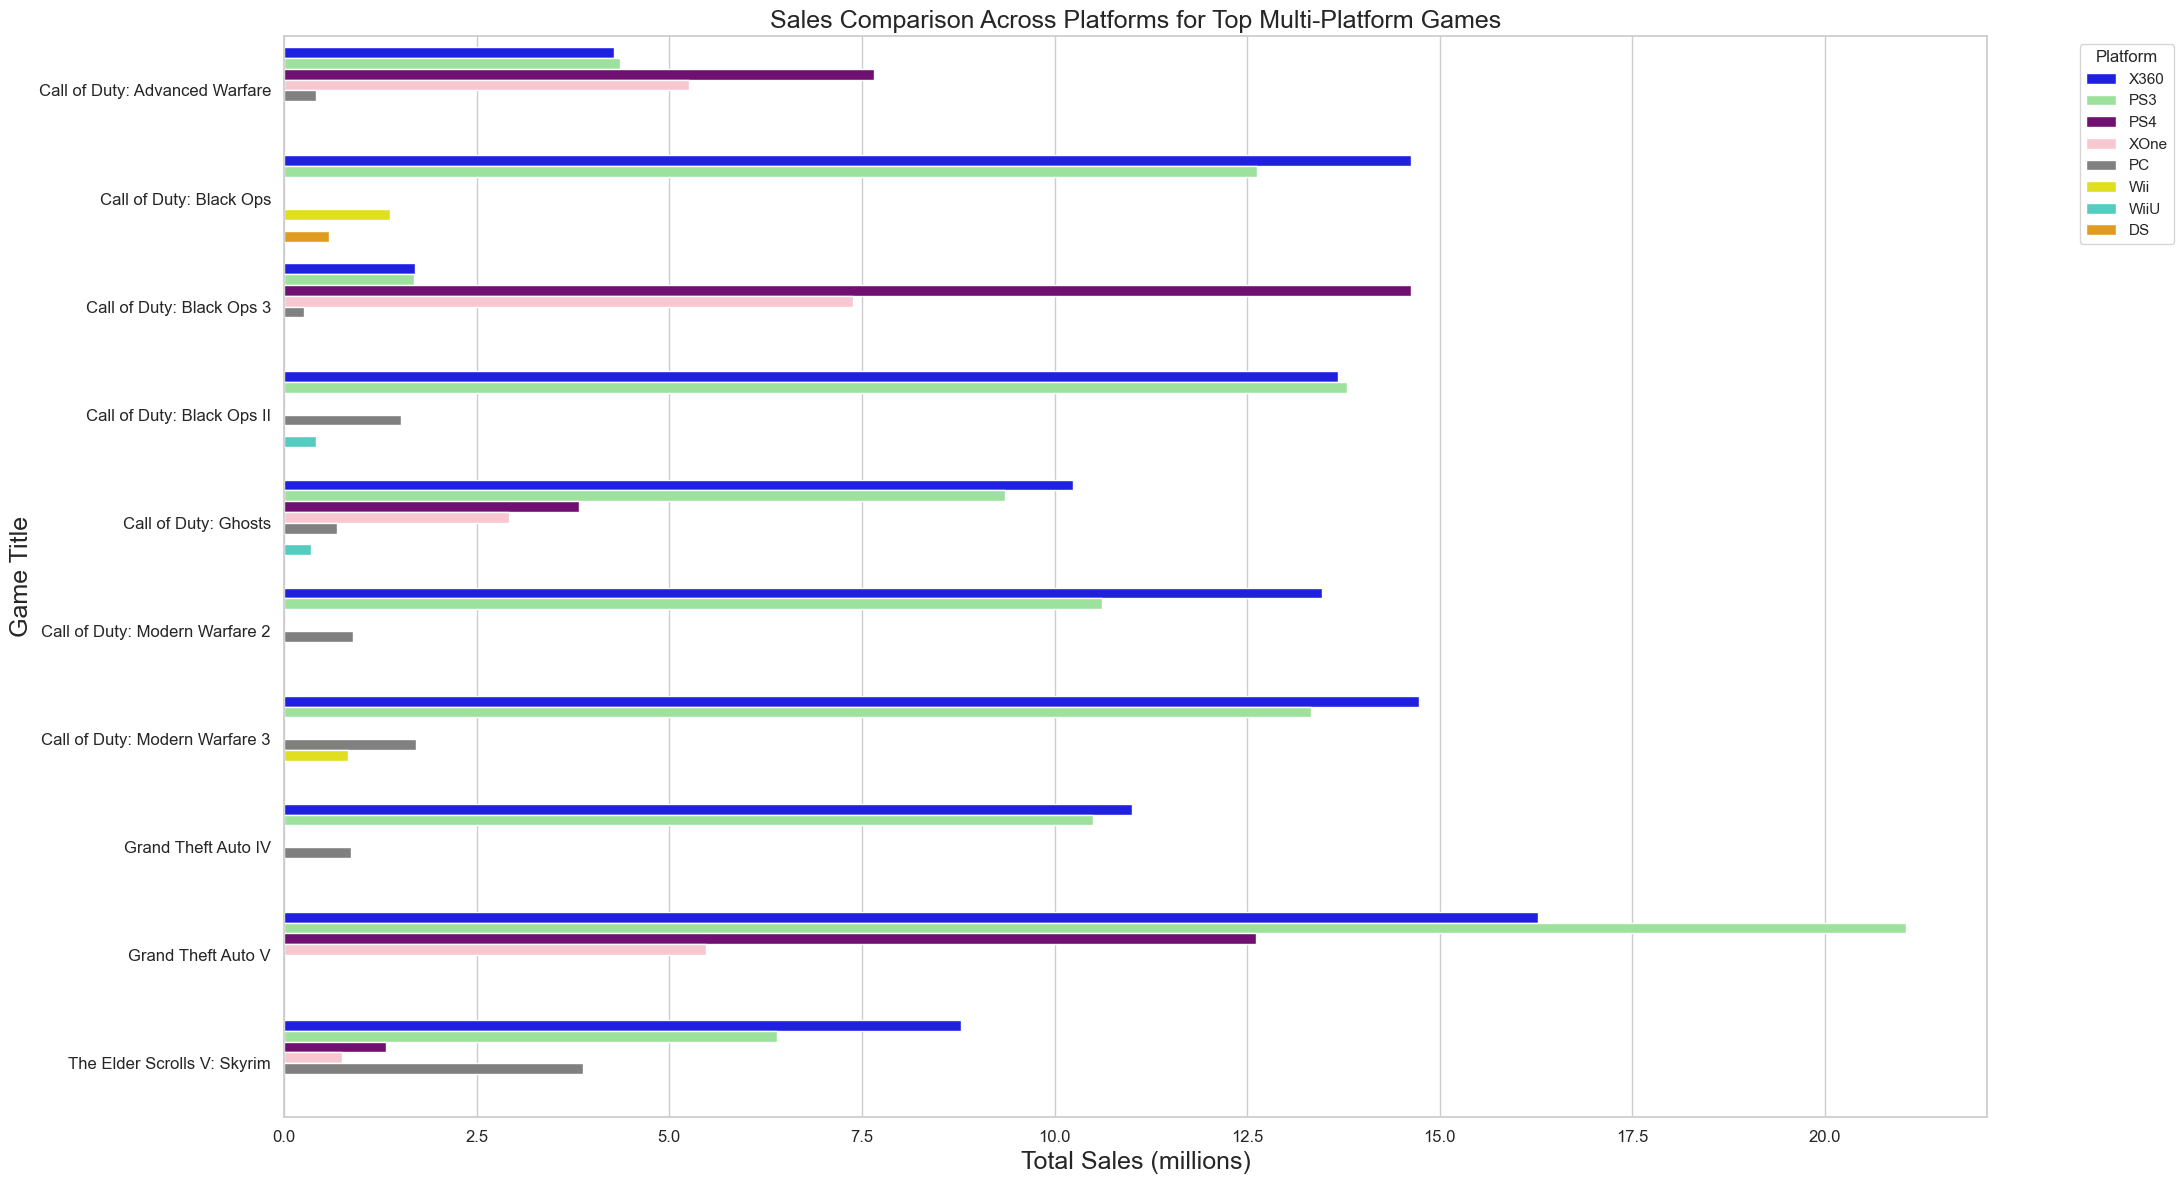

In [56]:
# compare the sales of the same games on other platforms
# find the same games on other platforms
multi_pltfrm = relevant_df[relevant_df.duplicated(['name', 'year_of_release'], keep=False)]

# Group by game name, year, platform
pltfrm_sales = (multi_pltfrm.groupby(['name', 'year_of_release', 'platform'], as_index=False)['total_sales']
    .sum().sort_values(['name', 'year_of_release', 'total_sales'], ascending=[True, True, False]))

# top 10 games with highest total sales in all platforms
top_games = (pltfrm_sales.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10).index)

# top multi-platform games only
top_pltfrm_sales = pltfrm_sales[pltfrm_sales['name'].isin(top_games)]
pltfrm_order = (top_pltfrm_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index.tolist())

# custom colors for each platform
colors = {'X360': 'Blue','PS3': 'LightGreen','PS4': 'Purple','XOne': 'Pink',
                   'PC': 'Gray','Wii': 'Yellow','WiiU': 'Turquoise','DS': 'Orange'}

plt.figure(figsize=(22, 12))
sns.barplot(data=top_pltfrm_sales, x='total_sales', y='name', hue='platform', hue_order=pltfrm_order, palette=colors)
plt.title('Sales Comparison Across Platforms for Top Multi-Platform Games', fontsize=18)
plt.xlabel('Total Sales (millions)', fontsize=18)
plt.ylabel('Game Title', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

##### **Conclusion:**
    - Some platforms dominate individual game sales: 
        * GTAV sold +20mil copies on PS4, outperforming all other platforms.
        * Call of Duty: Modern Warfare 3 had strongest sales on X360.
        * Black Ops II and Modern Warfare 2 also showed the highest sales on X360.

    - Xbox 360 and PS3/PS4 Lead the Market:
        * These platforms consistently appear with high sales figures across many games.
        * X360 stands out in several Call of Duty titles.
        * PS3/PS4 have strong performance for GTA V, Skyrim, and Black Ops III.

    - PC and Nintendo Platforms Have Niche Reach
        * PC have very modest sales games
        * Nintendo platforms have very limited contribution in top titles

    - Sales Are Fragmented
        * Some titles span multiple console generations, suggesting sustained demand that across console transitions.

    - Legacy Titles Still Matter
        * Some older gen games but have a cumulative cross-platform sales that is high indicating loyalty and replays over time.


##### Summary
    - choosing the right platforms for each game is very critical. 
    - some games perform way better on specific platforms, possibly due to: 
        * players demographics
        * console popularity at time of release
        * optimization for that platform
    -> platform-targeted marketing and feature tailoring might yield higher returns than a flat multi-platform strategy.

#### **Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

In [57]:
# count of games by genre
genre_counts = relevant_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts = genre_counts.sort_values(by='count', ascending=False)
genre_counts.head()

,genre,count
0,Action,2382
1,Sports,1262
2,Misc,1253
3,Adventure,1023
4,Role-Playing,996


/var/folders/rl/bvnd0syn45xf_336t5zbkm8c0000gn/T/ipykernel_8781/1611974169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='count', y='genre', palette='viridis')


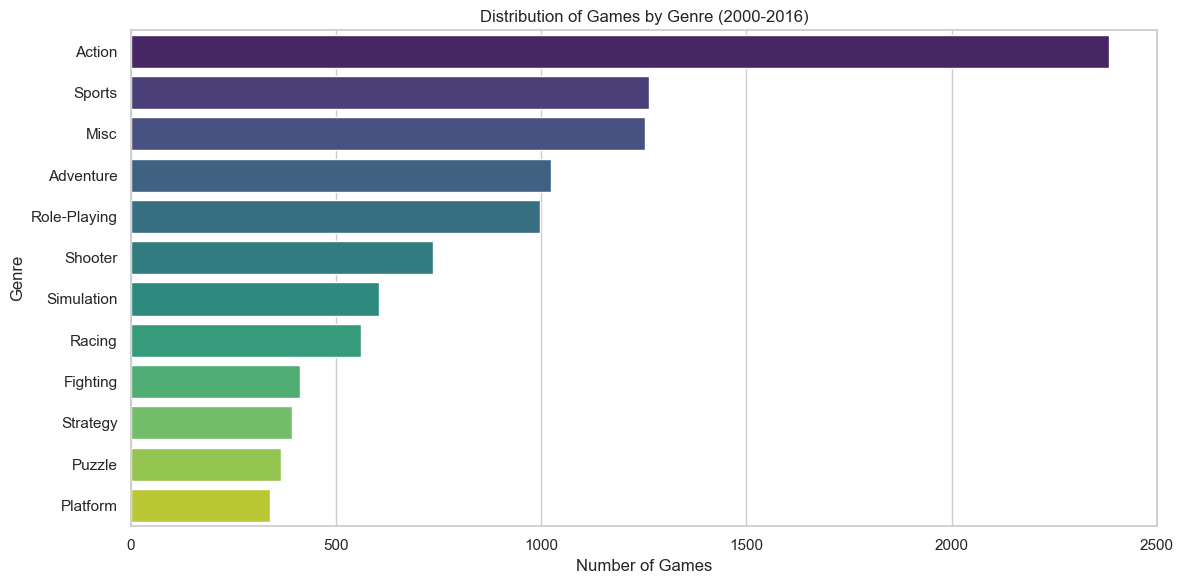

In [58]:
# visual
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='count', y='genre', palette='viridis')
plt.title('Distribution of Games by Genre (2000-2016)')
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.tight_layout()
plt.show()

##### **Conclusion:**
    - Action: the dominant genre, and are: 
        * not only the most common (2,382 titles), but also dominate top-selling multi-platforms.
        * consistently lead both in number of releases and in total revenue.
    - Sports (1,262) and Misc (1,253) are numerous, but not always top earners
        * have high release counts, but are not prevalent multi-platform games.
        * popular to develop, but only a few titles (like FIFA or Mario Kart) reach high sales.
        * many have moderate or niche appeal.
    - Adventure and role-playing games are highly profitable when successful
        * have slightly fewer releases, but successful, they reach extreme sales (Skyrim).
        * among the most lucrative genres
    - Shooter subgenre drives revenue
        * Many top Action games are also Shooters. 
    - Genre Popularity ≠ Profitability
        * having a large number of games in a genre does not guarantee high average sales per game.
        * Action and Shooter games combine both high release count and high revenue, while genres like Misc or Sports have many releases but fewer mega-hits.
**summ**
    - Action and Shooter games are the safest to develop for high sales.
    - Sports and Misc genres are prolific but require strong brand to get to top sales.
    - Adventure and RPGs can be extremely profitable but are less common.

    - Developers should balance genre popularity with market saturation and consider focusing on Action/Shooter or high-quality Adventure/RPG titles for the best chance at high sales.

### **Step 4. Create a user profile for each region**

#### **For each region (NA, EU, JP), determine:**

    The top five platforms. Describe variations in their market shares from region to region.
    The top five genres. Explain the difference.
    Do ESRB ratings affect sales in individual regions?

#### **The top five platforms. Describe variations in their market shares from region to region.**

In [59]:
# Group by platform and sum sales for each region
na_pltfrm = relevant_df.groupby('platform')['na_sales'].sum().reset_index()
top5_na = na_pltfrm.sort_values('na_sales', ascending=False).head(5)
top5_na.head(5)

,platform,na_sales
13,X360,588.84
11,Wii,486.87
7,PS3,390.13
2,DS,323.99
6,PS2,114.89


In [60]:
eu_pltfrm = relevant_df.groupby('platform')['eu_sales'].sum().reset_index()
top5_eu = eu_pltfrm.sort_values('eu_sales', ascending=False).head(5)
top5_eu.head(5)

,platform,eu_sales
7,PS3,327.21
13,X360,267.89
11,Wii,258.32
2,DS,142.99
8,PS4,141.09


In [61]:
jp_pltfrm = relevant_df.groupby('platform')['jp_sales'].sum().reset_index()
top5_jp = jp_pltfrm.sort_values('jp_sales', ascending=False).head(5)
top5_jp.head(5)

,platform,jp_sales
2,DS,141.49
0,3DS,100.62
7,PS3,79.41
9,PSP,70.63
11,Wii,68.28


In [62]:
# Combine results into one df
top_pltfrm_df = na_pltfrm.merge(eu_pltfrm, on='platform', how='outer') \
    .merge(jp_pltfrm, on='platform', how='outer').round(2)
top_pltfrm_df.fillna(0, inplace=True)
top_pltfrm_df

,platform,na_sales,eu_sales,jp_sales
0,3DS,82.65,61.27,100.62
1,DC,0.00,0.00,0.06
2,DS,323.99,142.99,141.49
3,GBA,5.15,1.88,1.51
4,GC,8.72,2.34,0.21
5,PC,44.45,100.32,0.00
6,PS2,114.89,46.28,35.93
7,PS3,390.13,327.21,79.41
8,PS4,108.74,141.09,15.96
9,PSP,80.54,54.21,70.63


In [63]:
# sort by total or region-specific sales
top_pltfrm_df['total'] = (top_pltfrm_df['na_sales'] + top_pltfrm_df['eu_sales'] + top_pltfrm_df['jp_sales'])
top_pltfrm_df.sort_values(by='total', ascending=False).head()
top_pltfrm_df

,platform,na_sales,eu_sales,jp_sales,total
0,3DS,82.65,61.27,100.62,244.54
1,DC,0.00,0.00,0.06,0.06
2,DS,323.99,142.99,141.49,608.47
3,GBA,5.15,1.88,1.51,8.54
4,GC,8.72,2.34,0.21,11.27
5,PC,44.45,100.32,0.00,144.77
6,PS2,114.89,46.28,35.93,197.10
7,PS3,390.13,327.21,79.41,796.75
8,PS4,108.74,141.09,15.96,265.79
9,PSP,80.54,54.21,70.63,205.38


<Figure size 1200x600 with 0 Axes>

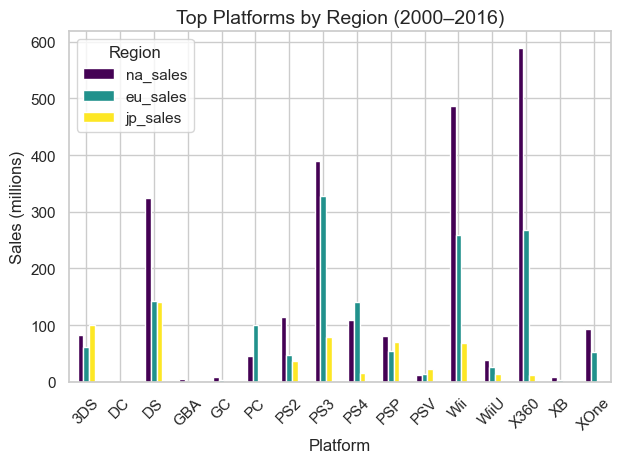

In [64]:
# Re-index and visualize
plt.figure(figsize=(12, 6))
top_pltfrm_df.set_index('platform')[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', colormap='viridis')
plt.title('Top Platforms by Region (2000–2016)', fontsize=14)
plt.ylabel('Sales (millions)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [65]:
top_pltfrm_df.describe().round(2)

,na_sales,eu_sales,jp_sales,total
count,16.00,16.00,16.00,16.00
mean,149.17,93.50,35.08,277.75
std,188.98,105.96,43.78,310.81
min,0.00,0.00,0.00,0.06
25%,11.53,10.40,0.31,38.35
50%,81.60,52.90,14.48,171.08
75%,167.17,141.56,68.87,351.46
max,588.84,327.21,141.49,868.75


## **Descriptioon of findings:**
    - NA is the dominant region in terms of sales, with more variability and high potential for top platforms.
    - EU follows, with moderate sales and relatively consistent distribution.
    - JP lags back, indicating more region-specific preferences.
    
    - Platform performance varies greatly by region, so companies planning a global launch should consider regional differences in platform popularity and market size.

#### **The top five genres. Explain the difference.**

In [66]:
# total sales by genre for each region (same reasoning as above)
na_genre_sales = relevant_df.groupby('genre')['na_sales'].sum().reset_index()
top5_na_genre = na_genre_sales.sort_values('na_sales', ascending=False).head(5)

eu_genre_sales = relevant_df.groupby('genre')['eu_sales'].sum().reset_index()
top5_eu_genre = eu_genre_sales.sort_values('eu_sales', ascending=False).head(5)

jp_genre_sales = relevant_df.groupby('genre')['jp_sales'].sum().reset_index()
top5_jp_genre = jp_genre_sales.sort_values('jp_sales', ascending=False).head(5)

In [67]:
# Combine results into one df
top_genre_df = na_genre_sales.merge(eu_genre_sales, on='genre', how='outer').merge(jp_genre_sales, on='genre', how='outer').round(2)
top_genre_df.fillna(0, inplace=True)
top_genre_df

,genre,na_sales,eu_sales,jp_sales
0,Action,530.44,350.70,102.07
1,Adventure,61.52,37.90,29.53
2,Fighting,94.31,42.63,28.61
3,Misc,285.06,146.88,64.53
4,Platform,134.25,81.62,35.20
5,Puzzle,42.49,27.77,12.43
6,Racing,132.93,113.39,13.20
7,Role-Playing,199.63,110.62,170.38
8,Shooter,373.13,238.89,19.35
9,Simulation,107.79,69.74,23.31


In [68]:
# sort by total
top_genre_df['total'] = (top_genre_df['na_sales'] + top_genre_df['eu_sales'] + top_genre_df['jp_sales'])

top_genre_df.sort_values(by='total', ascending=False).head()
top_genre_df

,genre,na_sales,eu_sales,jp_sales,total
0,Action,530.44,350.70,102.07,983.21
1,Adventure,61.52,37.90,29.53,128.95
2,Fighting,94.31,42.63,28.61,165.55
3,Misc,285.06,146.88,64.53,496.47
4,Platform,134.25,81.62,35.20,251.07
5,Puzzle,42.49,27.77,12.43,82.69
6,Racing,132.93,113.39,13.20,259.52
7,Role-Playing,199.63,110.62,170.38,480.63
8,Shooter,373.13,238.89,19.35,631.37
9,Simulation,107.79,69.74,23.31,200.84


<Figure size 1200x600 with 0 Axes>

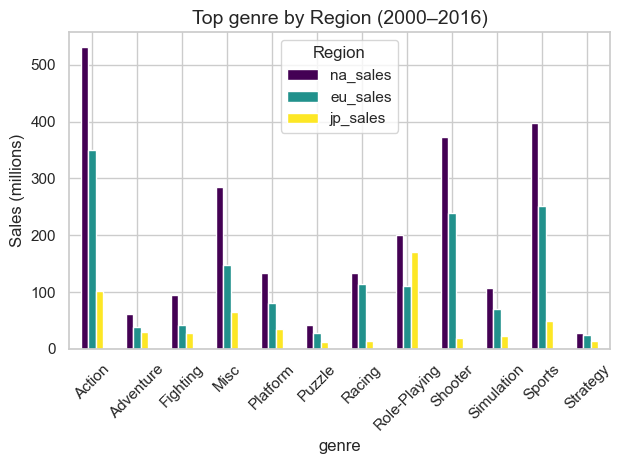

In [69]:
# Re-index and plot
plt.figure(figsize=(12, 6))
top_genre_df.set_index('genre')[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', colormap='viridis')
plt.title('Top genre by Region (2000–2016)', fontsize=14)
plt.ylabel('Sales (millions)', fontsize=12)
plt.xlabel('genre', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


#### Explain the difference.
    - there is a predominance of the north american sales, fllowed by europe, with Action and Sports genres as the dominamts, followed by Shooter which is a subgenre of Action.
    - Action sales in Japan is very low in comparison with Role-Playing (RPG).

#### **Do ESRB ratings affect sales in individual regions?**

In [71]:
# grouping by rating
esrb_sales = relevant_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

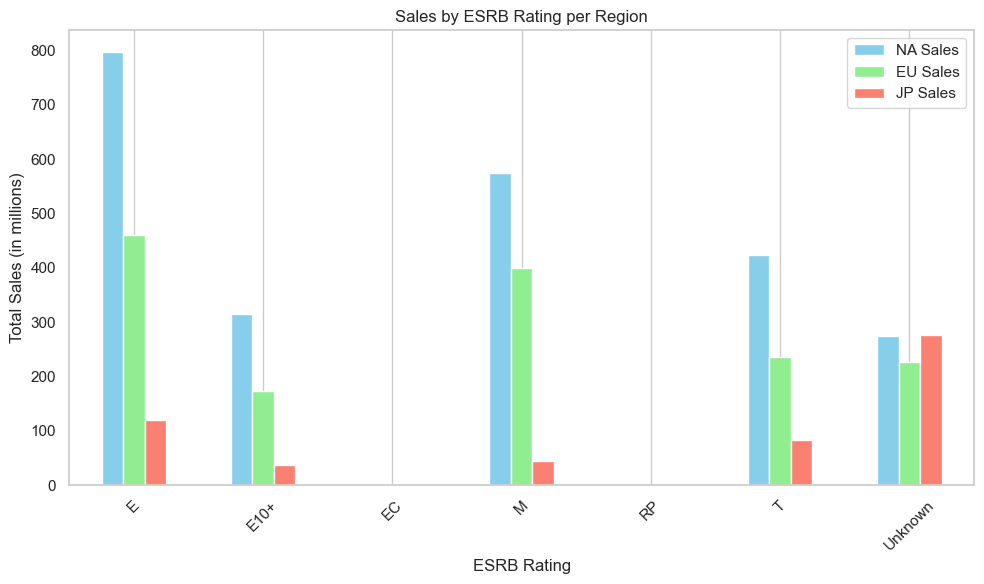

In [72]:
# visual
esrb_sales.plot(x='rating', kind='bar', figsize=(10, 6),stacked=False,color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sales by ESRB Rating per Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

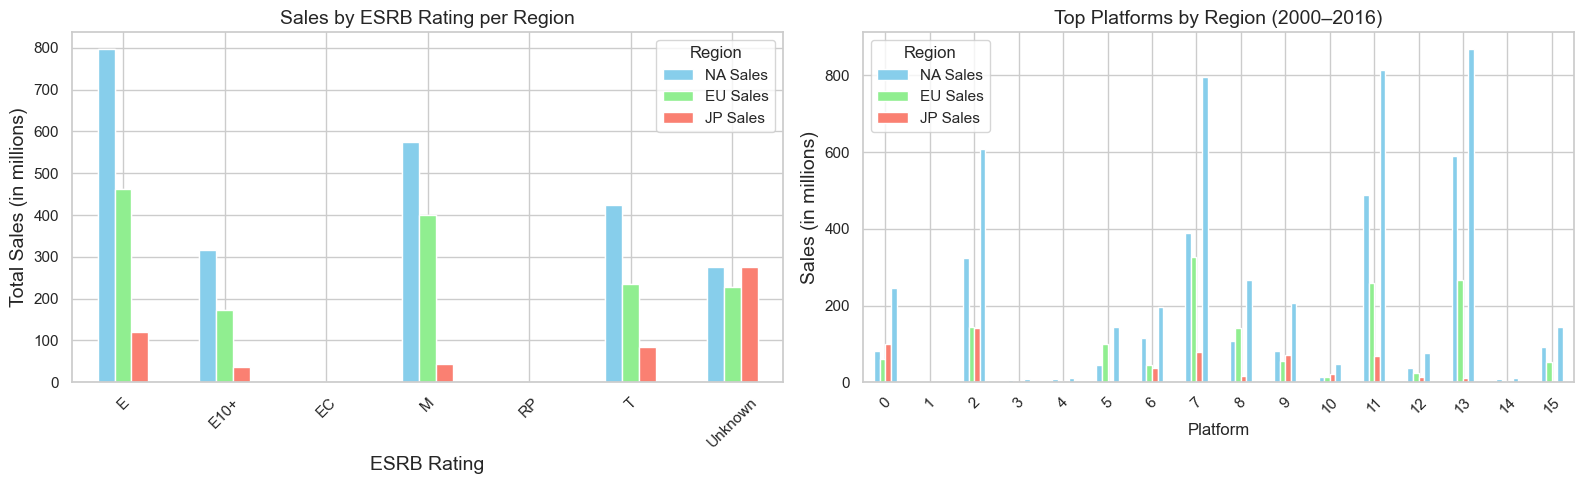

In [73]:
# compare global sales vs rating sales 
# scatter plots with regression lines and MI scores
esrb_grpd = esrb_sales.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
fig, axes = plt.subplots(1, 2, figsize=(16, 5))


# Plot 1: ESRB Rating per region
esrb_sales.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightgreen', 'salmon'])
esrb_grpd.plot(kind='bar', stacked=False, ax=axes[0], color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Sales by ESRB Rating per Region', fontsize=14)
axes[0].set_xlabel('ESRB Rating', fontsize=14)
axes[0].set_ylabel('Total Sales (in millions)', fontsize=14)
axes[0].legend(title='Region', labels=['NA Sales', 'EU Sales', 'JP Sales'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


# Plot 2: per region sales
top_pltfrm_df.plot(kind='bar', stacked=False, ax=axes[1], color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('Top Platforms by Region (2000–2016)', fontsize=14)
axes[1].set_xlabel('Platform', fontsize=12)
axes[1].set_ylabel('Sales (in millions)', fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Region', labels=['NA Sales', 'EU Sales', 'JP Sales'])

plt.tight_layout()
plt.show()

##### **Conclusion:**
    From our plot comparison, we can conclude that the ESRB ratings affect sales in individual regions. 
        -> North America and Europe have the highest sales for E (Everyone) and M (Mature) games, 
        -> while Japan's sales are highest for games with "Unknown" ratings. 
        
    we can conclude that regional preferences and different ratings influence which games sell best in each market

### **Step 5. Test the following hypotheses:**
    Average user ratings of the Xbox One and PC platforms are the same.
    Average user ratings for the Action and Sports genres are different.
    Set the alpha threshold value yourself.
Explain:

    - How you formulated the null and alternative hypotheses.
    - What criteria you used to test the hypotheses and why.

In [74]:
# Average user ratings of the Xbox One and PC platforms are the same
# filter the data
xone_rtng = relevant_df.query('platform == "XOne"')['user_score'].dropna()
pc_rtng = relevant_df.query('platform == "PC"')['user_score'].dropna()

# Welch’s t-test
alpha = 0.05
results = stats.ttest_ind(xone_rtng, pc_rtng, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis, the average user ratings of the Xbox One and PC platforms are different')
else:
    print('Fail to reject the null hypothesis')

p-value: 0.007680708468777272
We reject the null hypothesis, the average user ratings of the Xbox One and PC platforms are different


In [75]:
relevant_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [76]:
# Average user ratings for the Action and Sports genres are different.

# filter the data
action_ratings = relevant_df.query('genre == "Action"')['user_score'].dropna()
sports_ratings = relevant_df.query('genre == "Sports"')['user_score'].dropna()

# Welch’s t-test
alpha = 0.05
results = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis, The average user ratings of Action and Sports games are different')
else:
    print('Fail to reject the null hypothesis')

p-value: 0.0014119341731471668
We reject the null hypothesis, The average user ratings of Action and Sports games are different


##### **Conclusion:**
For the hypothesis: Average user ratings of the Xbox One and PC platforms are the same

    - Users rate difference between xbox one and pc games shows that on average, there is a statistically a significant difference in the user ratings between the Xbox One and PC platforms
    - The Welch's test was preferred because it helps compare the mean of two independent samples, even with unequal variances. 

For the hypothesis: Average user ratings for the Action and Sports genres are different:

    - Users rates difference between Action one and Sports genres shows that on average, there is a statistically a significant difference in the user ratings between action and sports genre, which contradicts our hypothesis, since the low p-value is very small. 
    - The Welch's test was also used in this case as it helps compare the mean of two independent samples, even with unequal variances. 

### **Step 6. Write a general conclusion**

### **Summary**
In this project, we analyzed video games data from 1980 to 2016 and made predictions for 2017, our conclusions were based on the different scores and ratings provided for each platform such as: critic score, users score, and ESRB ratings. 

The main objectives were to determine the variables that affect sales in order to determine a 2017 strategy to generate more sales. 
Our findings were that: 
the leading platforms are: X360, PS3, and Wii The shrinking platforms are: DC, GBA, and XB The growing platforms are: PS4, XOne, WiiU, Wii, and X360

    - it is a good strategy to:
        * aim the leading platforms such as: X360, PS3, and Wii when developers launch a new game in 2017, and the growing ones like: PS4, XOne, WiiU, Wii. 
        * avoid the shrinking platforms like: DC, GBA, and XB

    - developers should keep in mind that each region has a different genre affinity. For example, if developers would liketo aim the north american region, they should keep in mind that in this region, Action/ shooting and sports are the most profitable genre